In [1]:
#modules
from scipy.integrate import ode
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#constants
N = 1000 #population
S0, I0, R0, D0 = 999,1, 0, 0 #initial values
y0 = [S0, I0, R0] 
y02 = [S0, I0, R0, D0]
t0 = 0
tf = 200
dt = 0.1 #time step
barr = [0.4, 0.8, 0.5, 2] #different beta values for each plot. Chosen based on beta/gamma < N/S0 ~ 1
garr = [0.3, 0.1, 0.5, 1] # '' gamma
marr = [0.1, 0.2, 0.3, 0.4] # '' mu
alg = 'dop853' #runge-kutta order 8 numerical integration method

In [3]:
def SIR(t, y, b, g):
    """
    Function for the SIR model.
    
    Inputs:
    t: float: Time
    y: list: Array of [S, I, R]
    b: float: rate of infection
    g: float: rate of recovery
    
    Outputs:
    arrays of outputs of 3 SIR ODEs.
    """
    S, I, R = y
    return [-b*S*I/N, b*S*I/N-g*I, g*I]

In [4]:
#Putting time and SIR arrays into one list
plots = []
for i in range(len(barr)):
    solver = ode(SIR).set_integrator(alg).set_initial_value(y0, t0).set_f_params(barr[i], garr[i])
    t = [t0]
    y = [y0]
    while solver.successful() and solver.t < tf:
        t.append(solver.t+dt)
        y.append(solver.integrate(solver.t+dt))
    plots.append((np.array(t),np.array(y).T))

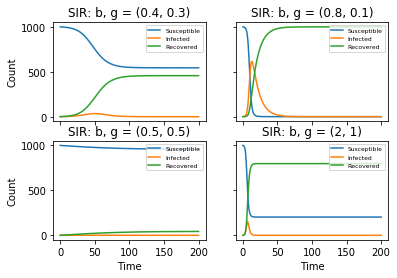

In [9]:
#plotting SIR using plt.subplots method
l = len(barr)
def rows(l):
    if l == 1:
        return 1
    return 2
fig, axs = plt.subplots(l//2+l%2, rows(l), squeeze = False) #Grid of plots  
for i, ax in enumerate(axs.flat):
    t, SIR = plots[i][0], plots[i][1]
    ax.plot(t, SIR[0], label = "Susceptible")
    ax.plot(t, SIR[1], label = "Infected")
    ax.plot(t, SIR[2], label = "Recovered")
    tup = (barr[i], garr[i])
    ax.set(xlabel = "Time", ylabel = "Count", title = 'SIR: b, g = %s' % (tup,))
    ax.legend(loc = "upper right", prop = {'size': 6})
    ax.label_outer()
plt.savefig("SIR.png")

In [6]:
#Repeating above with SIRD
def SIRD(t, y, b, g, m):
    """
    Function for the SIRD model.
    
    Inputs:
    t: float: Time
    y: list: Array of [S, I, R]
    b: float: infection rate
    g: float: recovery rate
    m: gloat: mortality rate
    
    Outputs:
    array of outputs of 3 SIR ODEs.
    """
    S, I, R, D = y
    return [-b*S*I/N, b*S*I/N-g*I-m*I, g*I, m*I]

In [7]:
plots2 = []
for i in range(len(barr)):
    solver = ode(SIRD).set_integrator(alg).set_initial_value(y02, t0).set_f_params(barr[i], garr[i], marr[i])
    t2 = [t0]
    y2 = [y02]
    while solver.successful() and solver.t < tf:
        t2.append(solver.t+dt)
        y2.append(solver.integrate(solver.t+dt))
    plots2.append((np.array(t2),np.array(y2).T))

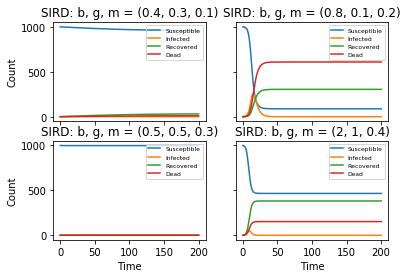

In [10]:
l = len(barr)
def rows(l):
    if l == 1:
        return 1
    return 2
fig2, axs2 = plt.subplots(l//2+l%2, rows(l), squeeze = False) #Grid of plots  
for i, ax in enumerate(axs2.flat):
    t, SIRD = plots2[i][0], plots2[i][1]
    l1 = ax.plot(t, SIRD[0], label = "Susceptible")
    l2 = ax.plot(t, SIRD[1], label = "Infected")
    l3 = ax.plot(t, SIRD[2], label = "Recovered")
    l4 = ax.plot(t, SIRD[3], label = "Dead")
    tup = (barr[i], garr[i], marr[i])
    ax.set(xlabel = "Time", ylabel = "Count", title = 'SIRD: b, g, m = %s' % (tup,))
    ax.legend(loc = "upper right", prop = {'size': 6})
    ax.label_outer()
plt.savefig("SIRD.png")